## SQLAlchemy Homework - Surfs Up!

In [3]:
# matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime as dt

 ### Reflect Tables into SQLAlchemy ORM

In [4]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
# Create an engine for the "hawaii.sqlite" database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Use Inspector to print the column names and types for "measurement" table
columns = inspector.get_columns("measurement")
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# Use engine.execute to select and display the first 10 rows from the "measurement" table
engine.execute("SELECT * FROM measurement LIMIT 10").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [9]:
# Use Inspector to print the column names and types for "station" table
columns = inspector.get_columns("station")
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Use engine.execute to select and display the first 10 rows from the "station" table
engine.execute("SELECT * FROM station LIMIT 10").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [11]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect = True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

 ### Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Latest date in the measurement table: {latest_date[0]}")

latestdate = dt.datetime.strptime(latest_date[0], "%Y-%m-%d")
startdate = dt.date(latestdate.year -1, latestdate.month, latestdate.day)
print(f"Starting date for query (- 1 year): {startdate}")

Latest date in the measurement table: 2017-08-23
Starting date for query (- 1 year): 2016-08-23


In [15]:
# Perform a query to retrieve the data and precipitation scores
queryresult = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= startdate).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation = pd.DataFrame(queryresult, columns=["Date","Precipitation"])
precipitation = precipitation.set_index("Date")

# Sort the dataframe by date
precipitation = precipitation.sort_values(["Date"], ascending=True)
precipitation.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


In [16]:
# Precipitation DataFrame contains NaN values - drop these.
precipitation = precipitation.dropna(how='any')
precipitation.head(20)

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


##### Noticed there were multiple precipitation readings per day and concerned that they were multiple readings taken in the same day that would require a group by date and then sum of precipitation to resolve. However, went back a few steps to the query and added Station to the Dataframe and found that the multiple precipitation readings were associated with the different weather stations so group by found not to be required.

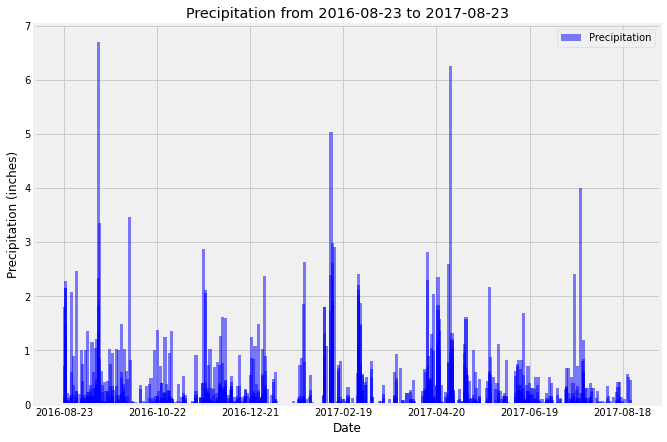

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis = precipitation.index
y_axis = precipitation["Precipitation"]

plt.figure(figsize=(10,7))
plt.bar(x_axis, y_axis, width = 2, color="blue", alpha=0.5, align="center",label="Precipitation")
major_ticks = np.arange(0,400,60)
plt.xticks(major_ticks)

plt.title(f"Precipitation from {startdate} to {latest_date[0]}")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.legend()
plt.show()

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?
unique_stations = session.query(Station.id).count()
print(f"The number of unique weather stations: {unique_stations}")

The number of unique weather stations: 9


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.id)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# Most active station = USC00519281
lowest_temp = session.query(func.min(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()
print(f"The lowest temperature recorded at weather station #USC00519281: {lowest_temp} deg F")

highest_temp = session.query(func.max(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()
print(f"The highest temperature recorded at weather station #USC00519281: {highest_temp} deg F")

average_temp = session.query(func.avg(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()
print(f"The average temperature recorded at weather station #USC00519281: {average_temp} deg F")

The lowest temperature recorded at weather station #USC00519281: (54.0,) deg F
The highest temperature recorded at weather station #USC00519281: (85.0,) deg F
The average temperature recorded at weather station #USC00519281: (71.66378066378067,) deg F


In [22]:
# Choose the station with the highest number of temperature observations.
active_temp_stations = session.query(Measurement.station,func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
active_temp_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Query the last 12 months of temperature observation data for this station.
queryresult2 = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.date >= startdate).filter(Measurement.station == "USC00519281").all()

# Save the query results as a Pandas DataFrame and set the index to the date column
temperature = pd.DataFrame(queryresult2, columns=["Date","Temperature"])
temperature = temperature.set_index("Date")

# Sort the dataframe by date
temperature = temperature.sort_values(["Date"], ascending=True)
temperature.head()

,Temperature
Date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


In [24]:
# Check for NaN values in Temperature DataFrame - none found.
temperature.value_counts()

Temperature
74.0           39
76.0           33
75.0           33
77.0           31
78.0           22
70.0           22
72.0           22
69.0           19
79.0           18
73.0           18
71.0           18
67.0           15
68.0           12
80.0           11
65.0            7
62.0            6
66.0            5
81.0            4
63.0            4
82.0            3
59.0            3
64.0            3
60.0            2
61.0            1
83.0            1
dtype: int64

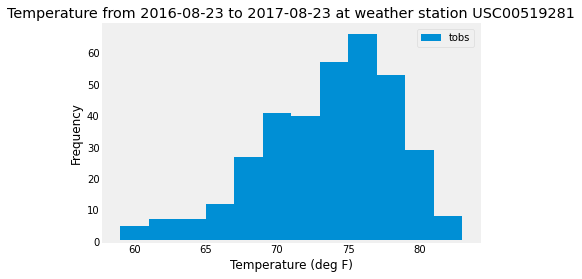

In [25]:
# Plot the results as a histogram
plt.hist(temperature, bins=12, rwidth=1.0, label="tobs")
plt.grid(axis="both", alpha=0.8)
plt.ylabel("Frequency")
plt.xlabel("Temperature (deg F)")
plt.title(f"Temperature from {startdate} to {latest_date[0]} at weather station USC00519281")
plt.legend()

 ### Bonus Challenge Assignment

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [73]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

#start_date = startdate.strftime("%Y-%m-%d")
#print(start_date)
# Startdate from previous analysis was 2016-08-23, therefore use 2015-08-23 for the start date
# plus 6 days (total trip length = 7 days) for the end date.
start_date = "2015-08-23"
end_date = "2015-08-29"

temps_result = (calc_temps(start_date, end_date))[0]
temps_result

(72.0, 78.59615384615384, 86.0)

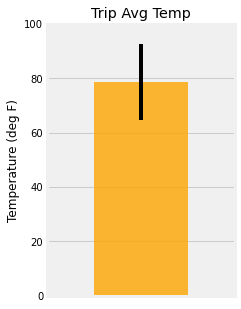

In [74]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
x_value = 0
y_value = temps_result[1]
yerr = temps_result[2] - temps_result[0]

plt.figure(figsize=(3, 5))
plt.bar(x_value,y_value,color="orange", yerr=yerr,alpha=0.8,width=0.5)
plt.title("Trip Avg Temp")
plt.xlim(-0.5,0.5)
plt.ylabel("Temperature (deg F)")
plt.ylim(0, 100)
plt.tick_params(axis="x",which="both",bottom=False,top=False,labelbottom=False)
plt.grid(which="major", axis="x", linestyle="")
plt.show()

In [75]:
# Calculate the total amount of rainfall per weather station for your trip dates using the 
# previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, 
# longitude, and elevation.

# Order of query:
# Join the two tables on station: Station.station == Measurement.station .
# Want the total rainfall PER weather station so need to group by weather station.
# Filter for greater than or equal to start date.
# Filter for less  than  or equal to end date.
# Then arrange in descending order by the sum of precipitation.

sel = [Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation,func.sum(Measurement.prcp)]
queryresult = session.query(*sel).\
    filter(Station.station == Measurement.station).\
    group_by(Measurement.station).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).\
    order_by(func.sum(Measurement.prcp).desc()).\
    all()
  
stations_prcp = pd.DataFrame(queryresult, columns=["Station","Name","Latitude","Longitude","Elevation","Total_Precipitation"])
stations_prcp

,Station,Name,Latitude,Longitude,Elevation,Total_Precipitation
0,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,10.41
1,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,8.99
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,6.53
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,4.61
4,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,2.36
5,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,2.10
6,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,1.94
7,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,1.50


In [76]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [77]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals = []

# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date

start = dt.datetime.strptime(start_date, "%Y-%m-%d")
end = dt.datetime.strptime(end_date, "%Y-%m-%d")

trip_dates = []
while (end >= start):
    trip_dates.append(dt.datetime.strftime(start,"%Y-%m-%d"))
    datestr = dt.datetime.strftime(start,"%m-%d")
    normals.append(list(np.ravel(daily_normals(datestr))))
    start = start + dt.timedelta(days = 1)

normals

[[67.0, 76.6923076923077, 87.0],
 [70.0, 75.96153846153847, 84.0],
 [69.0, 76.96078431372548, 82.0],
 [71.0, 76.56862745098039, 84.0],
 [68.0, 76.28301886792453, 84.0],
 [67.0, 76.73469387755102, 86.0],
 [70.0, 76.23529411764706, 85.0]]

In [79]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range 
# as the `date` index.
normals_df = pd.DataFrame(normals, columns = ["Temp_Min","Temp_Avg","Temp_Max"])
normals_df["Date"] = trip_dates
normals_df = normals_df.set_index("Date")
normals_df

,Temp_Min,Temp_Avg,Temp_Max
Date,,,
2015-08-23,67.0,76.692308,87.0
2015-08-24,70.0,75.961538,84.0
2015-08-25,69.0,76.960784,82.0
2015-08-26,71.0,76.568627,84.0
2015-08-27,68.0,76.283019,84.0
2015-08-28,67.0,76.734694,86.0
2015-08-29,70.0,76.235294,85.0


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, '2015-08-29'),
  Text(0.0, 0, '2015-08-23'),
  Text(1.0, 0, '2015-08-24'),
  Text(2.0, 0, '2015-08-25'),
  Text(3.0, 0, '2015-08-26'),
  Text(4.0, 0, '2015-08-27'),
  Text(5.0, 0, '2015-08-28'),
  Text(6.0, 0, '2015-08-29'),
  Text(7.0, 0, '')])

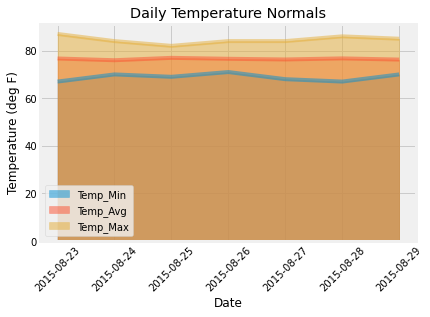

In [83]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot.area(stacked=False)
plt.title("Daily Temperature Normals")
plt.ylabel("Temperature (deg F)")
plt.xticks(rotation=45)